In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('./data/train.csv', index_col='id', encoding="ISO-8859-1")
test = pd.read_csv('./data/test.csv', index_col='id', encoding="ISO-8859-1")

products_description = pd.read_csv('./data/product_descriptions.csv')
products_attributes = pd.read_csv('./data/attributes.csv')

In [3]:
# merge datasets
train_merged = pd.merge(train, products_description, how='left', on='product_uid')
test_merged = pd.merge(test, products_description, how='left', on='product_uid')

In [4]:
train_merged.ix[0].product_description

'Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a "Z" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws'

In [226]:
import re

In [219]:
def addPeriod(matchobj):
    matched_group = matchobj.group(0)
    uppercase_index = re.search(r'[A-Z]', matched_group).start()
    return matched_group[:uppercase_index] + '. ' + matched_group[uppercase_index:]
re.sub(r'[a-z]+[A-Z][a-z]+', addPeriod, train_merged.ix[0].product_description)

'Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a "Z" at the end of the model number).Versatile connector for various 90 connections and home repair projects. Stronger than angled nailing or screw fastening alone. Help ensure joints are consistently straight and strong. Dimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steel. Galvanized for extra corrosion resistance. Install with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws'

In [5]:
for title in train.product_title[:100]:
    print title

Simpson Strong-Tie 12-Gauge Angle
Simpson Strong-Tie 12-Gauge Angle
BEHR Premium Textured DeckOver 1-gal. #SC-141 Tugboat Wood and Concrete Coating
Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included)
Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included)
Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking
Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking
Whirlpool 1.9 cu. ft. Over the Range Convection Microwave in Stainless Steel with Sensor Cooking
Lithonia Lighting Quantum 2-Light Black LED Emergency Fixture Unit
House of Fara 3/4 in. x 3 in. x 8 ft. MDF Fluted Casing
Valley View Industries Metal Stakes (4-Pack)
Toro Personal Pace Recycler 22 in. Variable Speed Self-Propelled Gas Lawn Mower with Briggs &amp; Stratton Engine
Toro Personal Pace Recycler 22 in. Variable Speed Self-Propelled Gas Lawn Mower with Briggs &amp; Stratton Engine
Toro Pe

In [8]:
train['num_titles'] = train.product_title.map(lambda x: len(x.split(' ')))

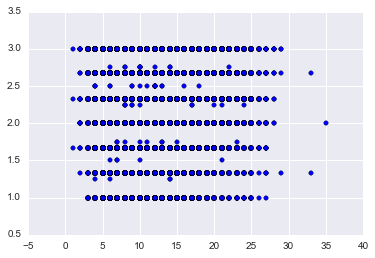

In [9]:
plt.scatter(train.num_titles, train.relevance);

In [12]:
def jaccard_distance(df):
    '''
    Jaccard distance = A intersection B / A U B
    '''
    search_term = set(df['search_term'])
    product_title = set(df['product_title'])
    
    return len(search_term & product_title) * 1. / len(search_term | product_title)

train['jaccard_distance'] = train.apply(jaccard_distance, axis=1)

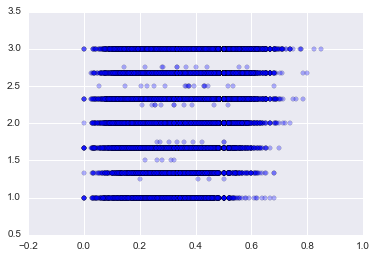

In [13]:
plt.scatter(train.jaccard_distance, train.relevance, alpha=0.3)

In [17]:
product_search_term_frequency = train.groupby('product_uid').size()

(54667L,)

In [18]:
train.product_uid.shape

(74067L,)

In [10]:
a = set(['a', 'b', 'c'])
b = set(['a', 'd', 'e'])

a_intersection_b = a & b

In [11]:
a_intersection_b

{'a'}

In [15]:
products_attributes[]

,product_uid,name,value
